<a href="https://colab.research.google.com/github/Kavindanipun/DL-LAB-2/blob/main/disease0001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile
zip_path = '/content/drive/MyDrive/disease_dataset.zip'  # Update the path to your rose disease dataset zip file
extract_path = '/content'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import random
import numpy as np
import os

In [15]:
train_data_dir = '/content/disease_dataset/train'
test_data_dir = '/content/disease_dataset/test'

In [16]:

# Define your dataset and preprocessing
data_dir = '/content/disease_dataset'
image_size = (128, 128)
batch_size = 64

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,  # Use the train_data_dir
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,  # Use the train_data_dir
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,  # Use the test_data_dir
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)




Found 214 images belonging to 4 classes.
Found 51 images belonging to 4 classes.
Found 165 images belonging to 4 classes.


In [21]:
num_classes = len(train_generator.class_indices)

In [22]:

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    Dropout(0.5),  # Add dropout with a specified rate
    layers.Dense(num_classes, activation='softmax')  # Update the number of output units
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 128)       0

In [24]:
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100, decay_rate=0.9)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)


In [25]:
# Compile the model with a different evaluation metric (e.g., precision)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:


# early_stopping = EarlyStopping(monitor='val_loss', patience=3)  # Add early stopping
history = model.fit(train_generator, validation_data=validation_generator, epochs=25 )

Epoch 1/25
4/4 [==============================] - 11s 2s/step - loss: 1.7178 - accuracy: 0.3271 - val_loss: 1.3656 - val_accuracy: 0.2353
Epoch 2/25
4/4 [==============================] - 11s 3s/step - loss: 1.3351 - accuracy: 0.3645 - val_loss: 1.2024 - val_accuracy: 0.4118
Epoch 3/25
4/4 [==============================] - 11s 3s/step - loss: 1.2274 - accuracy: 0.4439 - val_loss: 1.0381 - val_accuracy: 0.7255
Epoch 4/25
4/4 [==============================] - 10s 2s/step - loss: 1.0765 - accuracy: 0.5421 - val_loss: 0.8422 - val_accuracy: 0.7059
Epoch 5/25
4/4 [==============================] - 11s 3s/step - loss: 0.9750 - accuracy: 0.5888 - val_loss: 0.7298 - val_accuracy: 0.7059
Epoch 6/25
4/4 [==============================] - 9s 2s/step - loss: 0.9145 - accuracy: 0.5794 - val_loss: 0.7244 - val_accuracy: 0.6863
Epoch 7/25
4/4 [==============================] - 9s 2s/step - loss: 0.8994 - accuracy: 0.5981 - val_loss: 0.8548 - val_accuracy: 0.6863
Epoch 8/25
4/4 [====================

In [27]:

test_loss, test_accuracy = model.evaluate(test_generator)
test_accuracy_percentage = test_accuracy * 100
print(f'Test accuracy: {test_accuracy_percentage:.2f}%')
print(f'Test loss: {test_loss}')

3/3 [==============================] - 2s 499ms/step - loss: 0.4178 - accuracy: 0.8242
Test accuracy: 82.42%
Test loss: 0.41782456636428833


# New Section

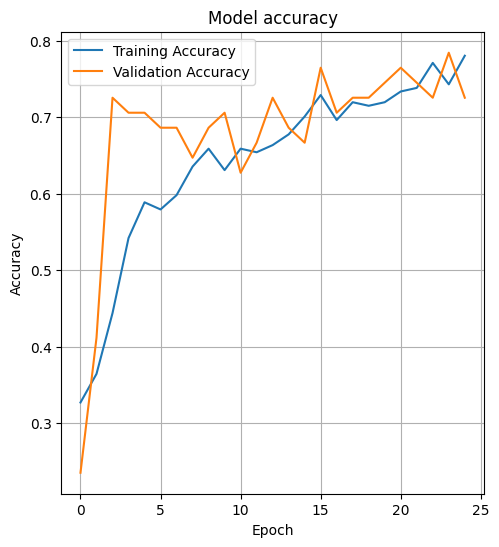

In [28]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

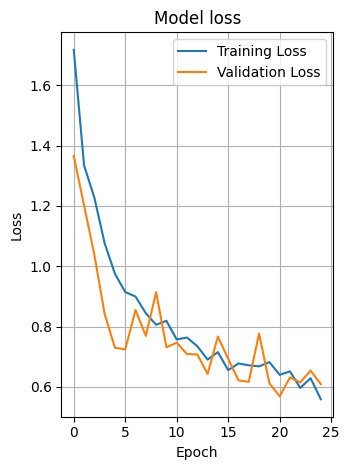

In [29]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [31]:
class_name_mapping = train_generator.class_indices


1/1 [==============================] - 0s 54ms/step
Actual Class: Powdery Mildew
Predicted Class: Powdery Mildew
Probability: 0.9594933986663818
Treatment: Treatment for Powdery Mildew disease: ...


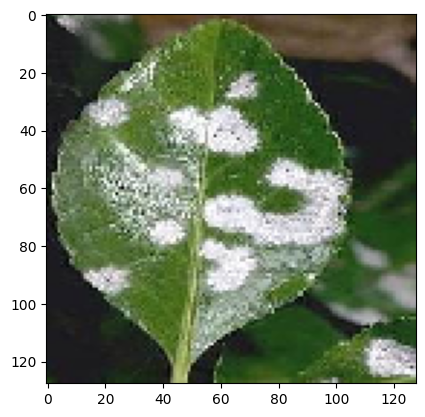

In [39]:
# Function to predict and display a random image with class probability
def predict_random_image(model, test_data_dir, class_name_mapping, disease_treatments, image_size):
    all_image_paths = []

    for dirpath, dirnames, filenames in os.walk(test_data_dir):
        for filename in filenames:
            if filename.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
                image_path = os.path.join(dirpath, filename)
                all_image_paths.append(image_path)

    random_image_path = random.choice(all_image_paths)
    random_class = os.path.basename(os.path.dirname(random_image_path))

    img = keras.preprocessing.image.load_img(random_image_path, target_size=image_size)
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = class_name_mapping[predicted_class_index]
    predicted_class_probability = np.max(predictions)
    treatment_info = disease_treatments.get(predicted_class_name, "No specific treatment information available.")

    plt.imshow(img)
    print(f'Actual Class: {random_class}\nPredicted Class: {predicted_class_name}\nProbability: {predicted_class_probability}\nTreatment: {treatment_info}')
    plt.show()

num_samples_to_predict = 1

for _ in range(num_samples_to_predict):
    predict_random_image(model, test_data_dir, class_name_mapping, disease_treatments, image_size)


1/1 [==============================] - 0s 31ms/step
Actual Class: Black_Spot
Predicted Class: Black_Spot
Probability: 0.9377809166908264
Treatment: Treatment for Black Spot disease: ...


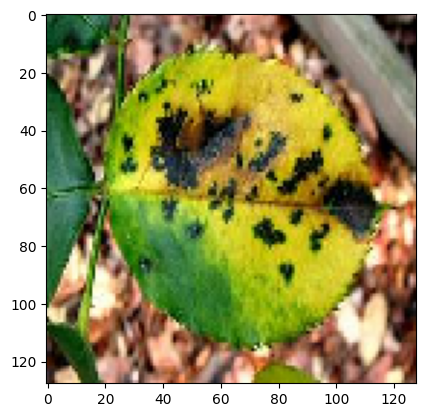

In [41]:
# Function to predict and display a random image with class probability
def predict_random_image(model, test_data_dir, class_name_mapping, disease_treatments, image_size):
    all_image_paths = []

    for dirpath, dirnames, filenames in os.walk(test_data_dir):
        for filename in filenames:
            if filename.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
                image_path = os.path.join(dirpath, filename)
                all_image_paths.append(image_path)

    random_image_path = random.choice(all_image_paths)
    random_class = os.path.basename(os.path.dirname(random_image_path))

    img = keras.preprocessing.image.load_img(random_image_path, target_size=image_size)
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = class_name_mapping[predicted_class_index]
    predicted_class_probability = np.max(predictions)
    treatment_info = disease_treatments.get(predicted_class_name, "No specific treatment information available.")

    plt.imshow(img)
    print(f'Actual Class: {random_class}\nPredicted Class: {predicted_class_name}\nProbability: {predicted_class_probability}\nTreatment: {treatment_info}')
    plt.show()

num_samples_to_predict = 1

for _ in range(num_samples_to_predict):
    predict_random_image(model, test_data_dir, class_name_mapping, disease_treatments, image_size)
